# Credit Card Attrition

The dataset used in this notebook was taken from https://zenodo.org/record/4322342#.Y_9CXexByWV. It contains customer information collected from within a consumer credit card portfolio.

### I. Business Understanding

The goal of collecting the dataset is to help predict customer attrition. The data is labeled to show if the customer is existing or attrited. Attrited customers are those who has ceased to be customer and the goal is to help understand what are the factors why a customer has attrited. If the business is able to understand these factors and predict if a customer will churn, the business can act proactive to prevent the probable attrition. To help us in understanding the, the dataset includes demographics, income category, and customer relationship information.

### II. Data Understanding

To help us with the goal of predicting customer attrition, we first need to understand the dataset. To do this we need to explore the data using Python libraries such as pandas, numpy, and scikit learn.

Let's first import the Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from statsmodels.stats.outliers_influence import variance_inflation_factor

We then load the dataset into a dataframe for us to explore:

In [2]:
df = pd.read_csv('BankChurners.csv')

Let's sample the data and display it. And try to understand the features of the dataset. We can also refer to this Kaggle link https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m to learn about the individual features.

In [3]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
121,719666283,Existing Customer,55,F,1,Doctorate,Married,Less than $40K,Blue,36,...,3174.0,1951,1223.0,0.766,1243,29,0.611,0.615,0.000028,0.999970
3576,711349083,Existing Customer,47,F,4,Doctorate,Married,Less than $40K,Blue,28,...,4012.0,0,4012.0,1.073,2962,60,0.765,0.000,0.000496,0.999500
166,714264408,Existing Customer,47,F,3,Uneducated,Married,Less than $40K,Blue,36,...,1611.0,746,865.0,0.993,1413,29,0.706,0.463,0.000022,0.999980
6672,798457833,Existing Customer,46,F,3,Graduate,Married,Unknown,Blue,40,...,3595.0,1087,2508.0,0.528,4534,71,0.919,0.302,0.000096,0.999900
2004,715310208,Existing Customer,53,M,3,Uneducated,Married,$80K - $120K,Blue,36,...,11450.0,2129,9321.0,0.956,2197,45,0.957,0.186,0.000116,0.999880
4335,715664808,Attrited Customer,43,M,2,Graduate,Single,$80K - $120K,Blue,30,...,34516.0,0,34516.0,0.688,2427,51,0.645,0.000,0.996710,0.003294
677,798792408,Attrited Customer,48,M,3,High School,Married,$80K - $120K,Blue,42,...,9959.0,0,9959.0,0.688,805,24,0.143,0.000,0.989410,0.010590
7952,779837808,Existing Customer,53,F,2,High School,Married,$40K - $60K,Blue,37,...,5182.0,2500,2682.0,0.869,5012,85,0.809,0.482,0.000355,0.999640
3928,713389233,Existing Customer,49,F,3,High School,Single,Unknown,Silver,36,...,31631.0,0,31631.0,0.632,3418,58,0.758,0.000,0.000104,0.999900
6487,710319108,Existing Customer,54,F,2,High School,Married,Less than $40K,Blue,47,...,1804.0,1298,506.0,0.758,4542,73,0.921,0.720,0.000186,0.999810


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Our dataset should have a minimum 1,000 instance as a requirement. Let's check how many.

In [6]:
df.shape[0]

10127

Let's undertand the demographics of the customers.

Text(0, 0.5, '# of Customers')

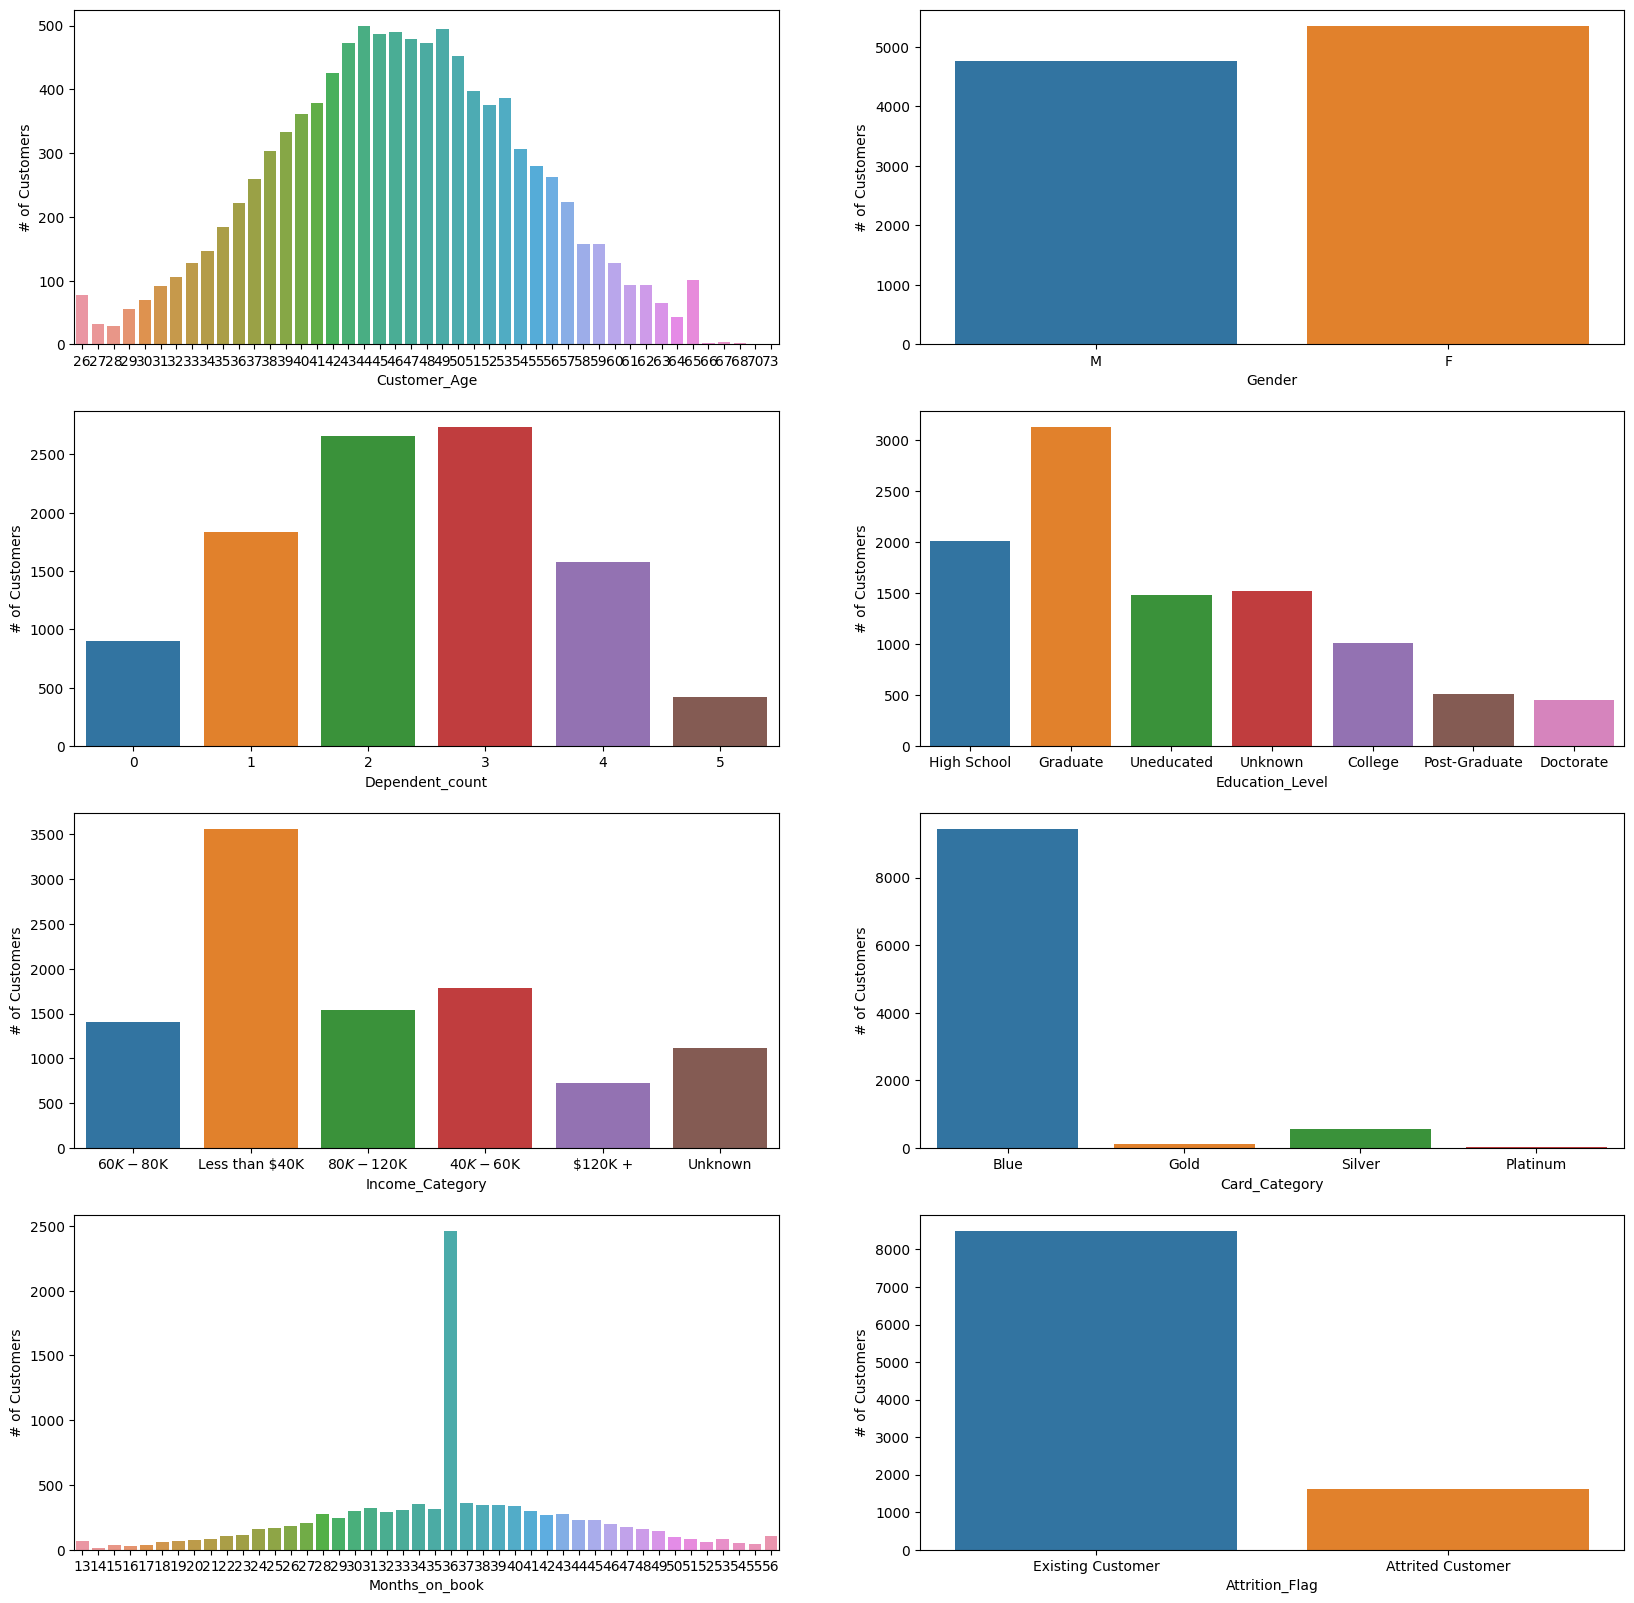

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
ax = sns.countplot(x='Customer_Age', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,2)
ax = sns.countplot(x='Gender', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,3)
ax = sns.countplot(x='Dependent_count', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,4)
ax = sns.countplot(x='Education_Level', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,5)
ax = sns.countplot(x='Income_Category', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,6)
ax = sns.countplot(x='Card_Category', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,7)
ax = sns.countplot(x='Months_on_book', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(4,2,8)
ax = sns.countplot(x='Attrition_Flag', data=df)
ax.set_ylabel('# of Customers')

Let's perform some visualization to check if the customer attrition has visual correlation to other features:

<AxesSubplot: xlabel='Customer_Age', ylabel='Avg_Utilization_Ratio'>

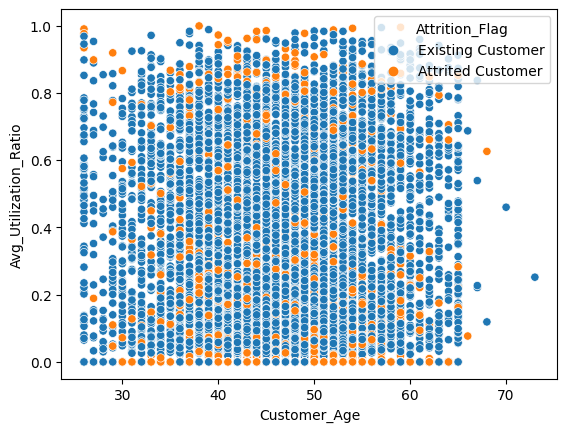

In [8]:
sns.scatterplot(x=df['Customer_Age'], y=df['Avg_Utilization_Ratio'], hue=df['Attrition_Flag'])

<AxesSubplot: xlabel='Customer_Age', ylabel='Total_Amt_Chng_Q4_Q1'>

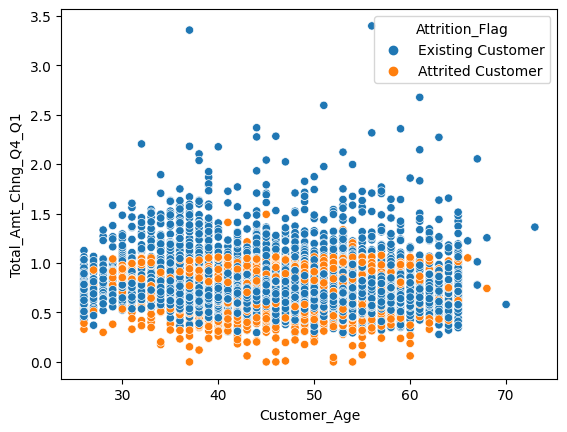

In [9]:
sns.scatterplot(x=df['Customer_Age'], y=df['Total_Amt_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

<AxesSubplot: xlabel='Credit_Limit', ylabel='Total_Amt_Chng_Q4_Q1'>

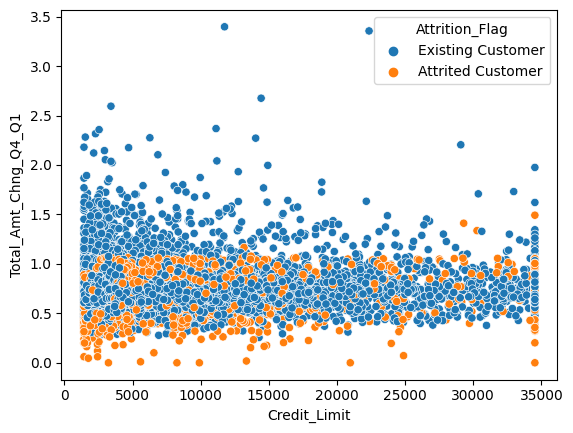

In [10]:
sns.scatterplot(x=df['Credit_Limit'], y=df['Total_Amt_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

<AxesSubplot: xlabel='Credit_Limit', ylabel='Total_Ct_Chng_Q4_Q1'>

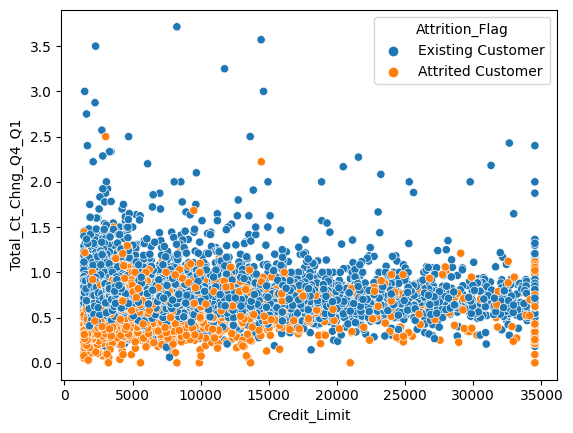

In [11]:
sns.scatterplot(x=df['Credit_Limit'], y=df['Total_Ct_Chng_Q4_Q1'], hue=df['Attrition_Flag'])

### III. Data Preparation

Now that we have a good understanding of the data, let's perform some data prepartion.

Remember, our attrition data is skewed, because attrited customer is way less that existing customer which is expected. But let's perform undersampling to balance this so that our model is not biased.

In [12]:
# Reference: https://www.linkedin.com/pulse/predicting-customer-churn-na%C3%AFve-bayes-classifier-python-prego

print('Distribution Before Undersampling')
out = df['Attrition_Flag'].value_counts()
print(out)

count_class_1 = sum(df['Attrition_Flag']=='Attrited Customer')
class_0 = df[df['Attrition_Flag']=='Existing Customer']
class_1 = df[df['Attrition_Flag']=='Attrited Customer']

under_class_0 = class_0.sample(count_class_1)
df = pd.concat([under_class_0, class_1], axis=0)
print('\n')
print('Distribution After Undersampling')
print(df['Attrition_Flag'].value_counts())

Distribution Before Undersampling
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Distribution After Undersampling
Existing Customer    1627
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


Now that we've done undersampling, let's see it visually.

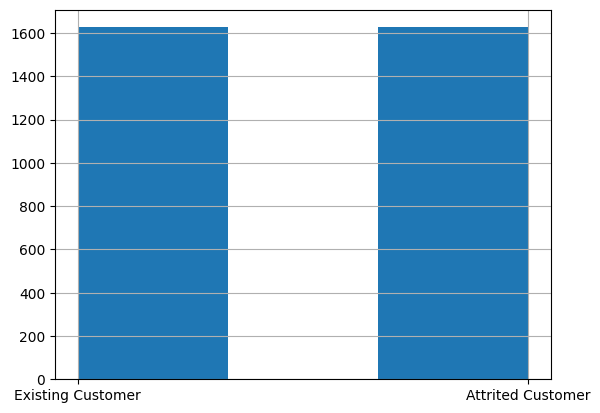

In [13]:
df['Attrition_Flag'].hist(bins=3)
plt.show()

Below are the list of things we've done with the data:

1. Standardize the feature names.
2. Convert attrition feature to boolean.
3. Perform one-hot encoding on categorical features.
4. Drop features that we do not need.

In [14]:
# rename columns
df.rename(
    columns={
        'Customer_Age':'age',
        'Dependent_count':'dependents',
        'Months_on_book':'months_on_book',
        'Total_Relationship_Count':'total_relationship_count',
        'Months_Inactive_12_mon':'months_inactive_12_mon',
        'Contacts_Count_12_mon':'contacts_count_12_mon',
        'Credit_Limit':'credit_limit',
        'Total_Revolving_Bal':'total_revolving_balance',
        'Avg_Open_To_Buy':'average_open_to_buy',
        'Total_Amt_Chng_Q4_Q1':'total_amount_change_q4_q1',
        'Total_Trans_Amt':'total_transaction_amount',
        'Total_Trans_Ct':'total_transaction_count',
        'Total_Ct_Chng_Q4_Q1':'total_count_change_q4_q1',
        'Avg_Utilization_Ratio':'average_utilization_ratio'
    },
    inplace=True
)

# one-hot encoding
df['gender_male'] = np.where(df['Gender']=='M', 1, 0)
df['gender_female'] = np.where(df['Gender']=='F', 1, 0)
df['education_high_school'] = np.where(df['Education_Level']=='High School', 1, 0)
df['education_graduate'] = np.where(df['Education_Level']=='Graduate', 1, 0)
df['education_uneducated'] = np.where(df['Education_Level']=='Uneducated', 1, 0)
df['education_unknown'] = np.where(df['Education_Level']=='Unknown', 1, 0)
df['education_college'] = np.where(df['Education_Level']=='College', 1, 0)
df['education_post_graduate'] = np.where(df['Education_Level']=='Post-Graduate', 1, 0)
df['education_doctorate'] = np.where(df['Education_Level']=='Doctorate', 1, 0)
df['marital_married'] = np.where(df['Marital_Status']=='Married', 1, 0)
df['marital_single'] = np.where(df['Marital_Status']=='Single', 1, 0)
df['marital_unknown'] = np.where(df['Marital_Status']=='Unknown', 1, 0)
df['marital_divorced'] = np.where(df['Marital_Status']=='Divorced', 1, 0)
df['income_less_than_40k'] = np.where(df['Income_Category']=='Less than $40K', 1, 0)
df['income_40k_60k'] = np.where(df['Income_Category']=='$40K - $60K', 1, 0)
df['income_60k_80k'] = np.where(df['Income_Category']=='$60K - $80K', 1, 0)
df['income_80k_120k'] = np.where(df['Income_Category']=='$80K - $120K', 1, 0)
df['income_more_than_120k'] = np.where(df['Income_Category']=='$120K +', 1, 0)
df['income_unknown'] = np.where(df['Income_Category']=='Unknown', 1, 0)
df['card_blue'] = np.where(df['Card_Category']=='Blue', 1, 0)
df['card_gold'] = np.where(df['Card_Category']=='Gold', 1, 0)
df['card_silver'] = np.where(df['Card_Category']=='Silver', 1, 0)
df['card_platinum'] = np.where(df['Card_Category']=='Platinum', 1, 0)

# label feature
df['attrition'] = np.where(df['Attrition_Flag']=='Existing Customer', 0, 1)

# drop columns
# df = df.drop('CLIENTNUM', axis=1)
df = df.drop('Attrition_Flag', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Education_Level', axis=1)
df = df.drop('Marital_Status', axis=1)
df = df.drop('Income_Category', axis=1)
df = df.drop('Card_Category', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1)

After performing data preparation, let's sample the data to see how it looks like.

In [15]:
df.sample(10)

,CLIENTNUM,age,dependents,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_balance,average_open_to_buy,...,income_40k_60k,income_60k_80k,income_80k_120k,income_more_than_120k,income_unknown,card_blue,card_gold,card_silver,card_platinum,attrition
1470,721084833,48,5,34,5,0,2,17657.0,2018,15639.0,...,1,0,0,0,0,0,0,1,0,0
6079,714046608,49,0,39,5,6,3,19719.0,1395,18324.0,...,0,1,0,0,0,1,0,0,0,0
5823,716669658,51,1,33,6,3,3,2006.0,1608,398.0,...,0,0,0,0,0,1,0,0,0,1
6870,719516208,54,2,36,3,2,3,34516.0,0,34516.0,...,0,0,0,1,0,1,0,0,0,1
5661,768632958,59,1,49,3,4,6,8708.0,1091,7617.0,...,0,0,0,0,1,1,0,0,0,1
4888,720905133,43,3,29,1,2,6,11422.0,1095,10327.0,...,0,0,1,0,0,1,0,0,0,1
6872,801516183,52,4,46,3,3,3,3231.0,2215,1016.0,...,0,0,0,0,0,1,0,0,0,0
4335,715664808,43,2,30,3,3,3,34516.0,0,34516.0,...,0,0,1,0,0,1,0,0,0,1
3304,715234008,54,1,36,6,3,3,4717.0,1590,3127.0,...,1,0,0,0,0,1,0,0,0,0
127,720201033,53,2,41,3,3,2,11669.0,2227,9442.0,...,0,0,1,0,0,1,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 2127 to 10126
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLIENTNUM                  3254 non-null   int64  
 1   age                        3254 non-null   int64  
 2   dependents                 3254 non-null   int64  
 3   months_on_book             3254 non-null   int64  
 4   total_relationship_count   3254 non-null   int64  
 5   months_inactive_12_mon     3254 non-null   int64  
 6   contacts_count_12_mon      3254 non-null   int64  
 7   credit_limit               3254 non-null   float64
 8   total_revolving_balance    3254 non-null   int64  
 9   average_open_to_buy        3254 non-null   float64
 10  total_amount_change_q4_q1  3254 non-null   float64
 11  total_transaction_amount   3254 non-null   int64  
 12  total_transaction_count    3254 non-null   int64  
 13  total_count_change_q4_q1   3254 non-null   f

Then split the data into training and test dataset. Our test dataset is at 30%.

In [17]:
X = df.drop(['attrition','CLIENTNUM'], axis=1)
y = df['attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

Then we'll normalize our dataset.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### IV. Modeling and Evaluation

Let's train our model and perform evaluation.

#### A. k-Nearest Neighbor (kNN)

We are using scikit-learn to perform classification of the customer attrition using kNN algorithm. We referenced on the article https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn.

We don't know yet what is the best "k", so let's just start with k=3.

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Then run the model using the test dataset and check the accuracy.

In [20]:
y_knn_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_knn_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7082906857727738


Our accuracy is not great and not too bad. But let's perform cross validation and find the best value for "k".

Text(0, 0.5, 'Accuracy Score')

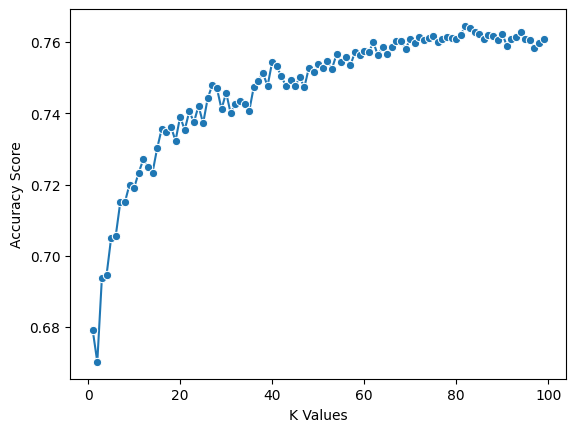

In [21]:
k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

And the best "k" is...

In [22]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=82)

After re-training the model using the best "k", let's measure the accuracy, precision, and recall.

In [23]:
y_knn_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_knn_pred)
precision = precision_score(y_test, y_knn_pred)
recall = recall_score(y_test, y_knn_pred)

print("Accuracy:", accuracy)
print("Precision:", precision) # true positive / (true positive + false positive)
print("Recall:", recall) # true positive / (true positive + false negative)

Accuracy: 0.7932446264073695
Precision: 0.7684426229508197
Recall: 0.8081896551724138


#### B. Naïve Bayes

Reference: https://www.kaggle.com/code/gauravduttakiit/telecom-churn-case-study-with-naive-bayes

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [25]:
y_gnb_pred = gnb.predict(X_train)
accuracy = accuracy_score(y_train, y_gnb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.790074659639877


In [26]:
vif = pd.DataFrame()
X_train_columns = pd.DataFrame(X_train, columns=df.drop(['attrition','CLIENTNUM'], axis=1).columns)
vif['Features'] = X_train_columns.columns
vif['VIF'] = [variance_inflation_factor(X_train_columns.values, i) for i in range(X_train_columns.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

/usr/local/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,total_amount_change_q4_q1,1.25
3,total_relationship_count,1.10
5,contacts_count_12_mon,1.07
4,months_inactive_12_mon,1.06
1,dependents,1.06


In [27]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['education_uneducated', 'education_unknown', 'education_post_graduate', 'education_doctorate', 'marital_married', 'marital_single', 'marital_unknown', 'marital_divorced', 'income_less_than_40k', 'income_40k_60k', 'income_60k_80k', 'income_80k_120k', 'income_more_than_120k', 'income_unknown', 'card_blue', 'card_gold', 'card_silver', 'education_college', 'card_platinum', 'education_high_school', 'gender_female', 'gender_male', 'education_graduate', 'average_open_to_buy', 'total_revolving_balance', 'credit_limit']


In [28]:
X_train = X_train_columns.drop(columns=features_to_remove, axis = 1)
X_train.head()

,age,dependents,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_amount_change_q4_q1,total_transaction_amount,total_transaction_count,total_count_change_q4_q1,average_utilization_ratio
0,0.581399,-1.054874,-0.132229,-1.630556,-0.491280,0.293496,-0.359048,0.302851,1.362244,0.677155,-0.826589
1,-0.057584,1.316250,-0.132229,1.500475,0.538780,-0.605953,-1.235563,-0.288427,-0.018564,0.008713,-0.623000
2,0.709196,0.525875,1.372574,-0.378144,0.538780,-1.505402,0.854926,-0.407871,-0.285817,-0.335637,0.530670
3,-0.185381,-0.264500,-0.006829,1.500475,3.628961,0.293496,-0.753480,-0.161065,0.649569,0.353062,-0.826589
4,-0.568771,2.106624,-0.759230,-0.378144,-1.521341,1.192946,0.096740,-0.930518,-0.909408,-0.829879,-0.826589


In [29]:
X_test_columns = pd.DataFrame(X_test, columns=df.drop(['attrition','CLIENTNUM'], axis=1).columns)
X_test = X_test_columns.drop(columns=features_to_remove, axis = 1)
X_test.head()

,age,dependents,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_amount_change_q4_q1,total_transaction_amount,total_transaction_count,total_count_change_q4_q1,average_utilization_ratio
0,2.242755,-1.845249,2.124975,-1.630556,0.538780,0.293496,1.244975,-0.948665,-1.711167,-1.052693,-0.826589
1,0.836992,-0.264500,-0.383030,-0.378144,0.538780,-1.505402,-1.822829,-0.846050,-0.909408,-1.802159,1.087861
2,-0.185381,1.316250,0.369372,0.248062,-1.521341,-0.605953,0.087975,-0.636529,-0.775781,0.519160,-0.690863
3,-0.313178,-0.264500,-0.508430,0.874269,0.538780,0.293496,-0.508056,-0.480131,-0.597613,0.912123,1.212872
4,0.325806,-1.054874,-0.006829,-1.004350,0.538780,-0.605953,-0.591325,4.313443,2.921221,0.199117,-0.437270


In [30]:
gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
y_gnb_pred = gnb.predict(X_train)
accuracy = accuracy_score(y_train, y_gnb_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7883179622310057


In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

,Features,VIF
3,total_relationship_count,1.08
5,contacts_count_12_mon,1.06
10,average_utilization_ratio,1.06
4,months_inactive_12_mon,1.05
1,dependents,1.03


In [33]:
confusion = confusion_matrix(y_train, y_gnb_pred)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#sensitivity = TP / float(TP+FN)
#specificity = TN / float(TN+FP)
#fp_rate = FP/ float(TN+FP)
accuracy = accuracy_score(y_train, y_gnb_pred)
precision = precision_score(y_train, y_gnb_pred)
recall = recall_score(y_train, y_gnb_pred)

print('Accuracy:', accuracy)
print('Precision:', precision) # true positive / (true positive + false positive)
print('Recall:', recall) # true positive / (true positive + false negative)
#print()
#print('Sensitivity:', sensitivity)
#print('Specificity:', specificity)
#print('False positive rate:', fp_rate)

Accuracy: 0.7883179622310057
Precision: 0.7775061124694377
Recall: 0.820292347377472


#### C. Decision Tree

Reference: https://www.datacamp.com/tutorial/decision-tree-classification-python

In [34]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)

In [35]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
y_dt_pred = clf.predict(X_test)

In [37]:
y_dt_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [38]:
clf.predict_proba(X_test)

array([[0.05084746, 0.94915254],
       [0.72830189, 0.27169811],
       [0.72830189, 0.27169811],
       ...,
       [0.02919708, 0.97080292],
       [0.02919708, 0.97080292],
       [0.98815567, 0.01184433]])

In [39]:
accuracy = accuracy_score(y_test, y_dt_pred)
precision = precision_score(y_test, y_dt_pred)
recall = recall_score(y_test, y_dt_pred)

print('Accuracy:', accuracy)
print('Precision:', precision) # true positive / (true positive + false positive)
print('Recall:', recall) # true positive / (true positive + false negative)

Accuracy: 0.8659160696008188
Precision: 0.8284023668639053
Recall: 0.9051724137931034


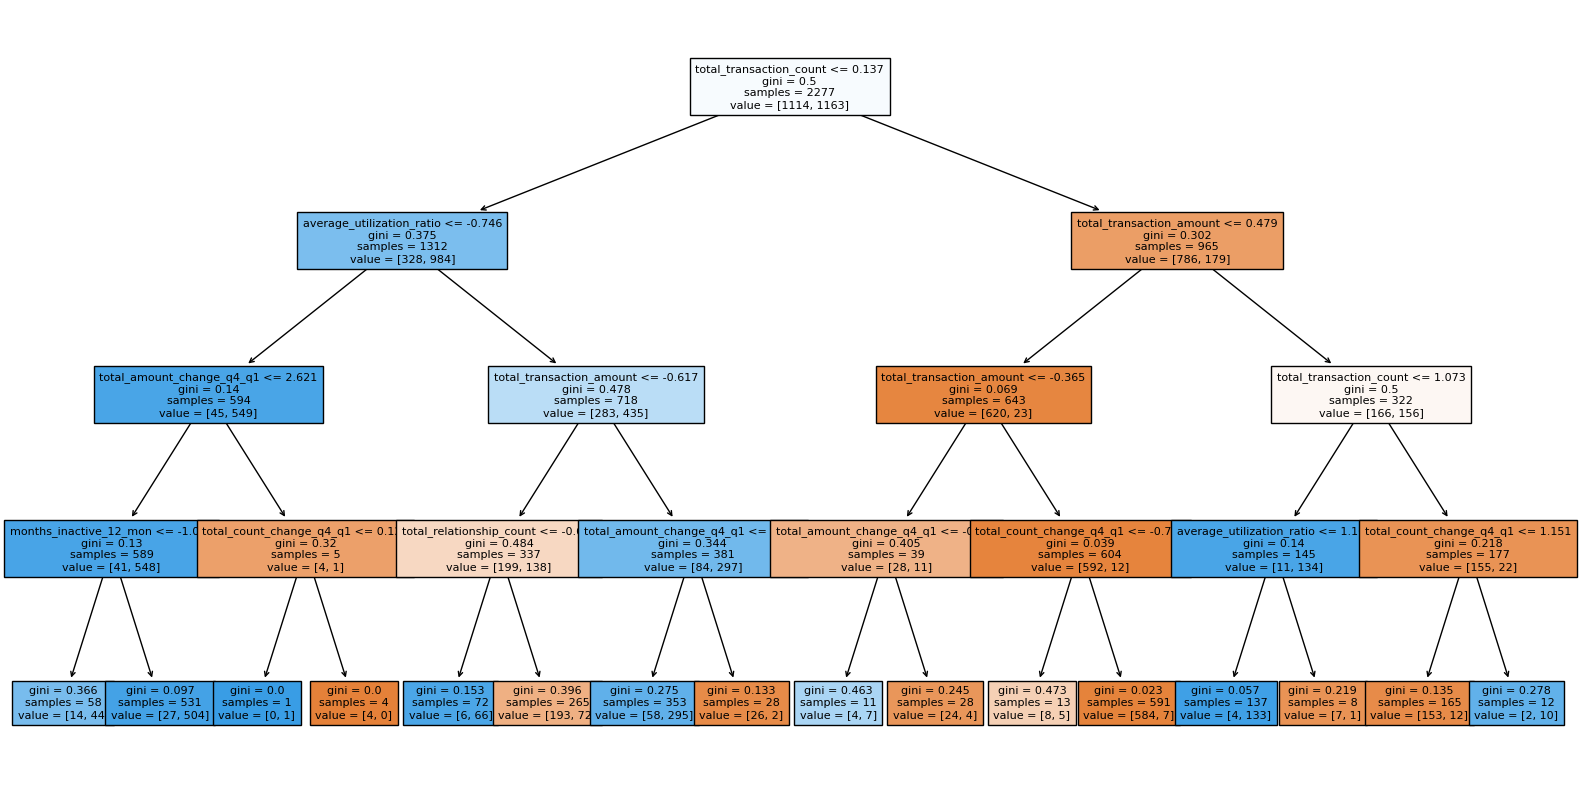

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(clf,
    filled=True,
    feature_names=X_train.columns,
    fontsize=8)
plt.show()